<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 다룰 내용

- 모델 성능 평가 시 어느 정도의 성능이 나올 지 객관적으로 예측할 수 있을까요?

In [46]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

## 1.데이터 준비

In [47]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

# 확인
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [48]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split

# Target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

# 학습용, 평가용 데이터 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

## 2.생각해 볼 문제

- 다음과 같이 모델을 만들어 학습을 완료 했습니다.
- 그럼 과연 평가 데이터에 대한 성능이 얼마나 나올까요?

In [49]:
# 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 선언하기, 학습하가
model = DecisionTreeClassifier(random_state=1) #공부 열심히 했냐 - 네 - 수능 잘 나오겠냐 - 모르겠어요
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

- 평가를 해 보기 전에 성능을 예측할 수 없습니다.
- 예측도 못하고 평가를 한다? 뭔가 대책이 필요합니다...

## 3.이 방법은 어떨지...

- 학습 데이터를 조금만 떼 내어 검증용 데이터로 사용해 보면 어떨까요?

In [50]:
# 학습용(x_train), 검증용(y_train) 데이터 7:3으로 분리
x_val_train, x_val_test, y_val_train, y_val_test = train_test_split(x_train, y_train, test_size=0.1, random_state=1) # 9 : 1

In [51]:
# 선언하기, 학습하가
model = DecisionTreeClassifier(random_state=1)
model.fit(x_val_train, y_val_train)

# 예측하기
y_val_pred = model.predict(x_val_test)

# 평가하기
print('예상되는 Accuracy:', accuracy_score(y_val_test, y_val_pred))

예상되는 Accuracy: 0.8285714285714286


- 0.83 정도의 정확도가 나올 것으로 예상됩니다.
- 하지만 이렇게 딱 한 번 검증해 보고 0.83 정도의 정확도를 예상할 수 있을까요? -> 한 번은 자신 없다

## 4.무작위 추출 해 여러 번 검증!!!

- 랜덤하게 학습용, 검증용 데이터를 분리해 여러 번 테스트를 해보면 어떨까요?

In [43]:
# 선언하기
model = DecisionTreeClassifier(random_state=1)

# 반복 검증
result = []
for n in range(10): #10번을 돌려서 
    x_val_train, x_val_test, y_val_train, y_val_test = train_test_split(x_train, y_train, test_size=0.1) 
    model.fit(x_val_train, y_val_train)
    y_val_pred = model.predict(x_val_test)
    result.append(accuracy_score(y_val_test, y_val_pred))

# 확인
print('결과:', np.round(result, 2))
print('평균:', np.mean(result))
print('표준편차:', np.std(result))

결과: [0.86 0.8  0.86 0.8  0.8  0.77 0.86 0.86 0.74 0.86]
평균: 0.82
표준편차: 0.04050699108216518


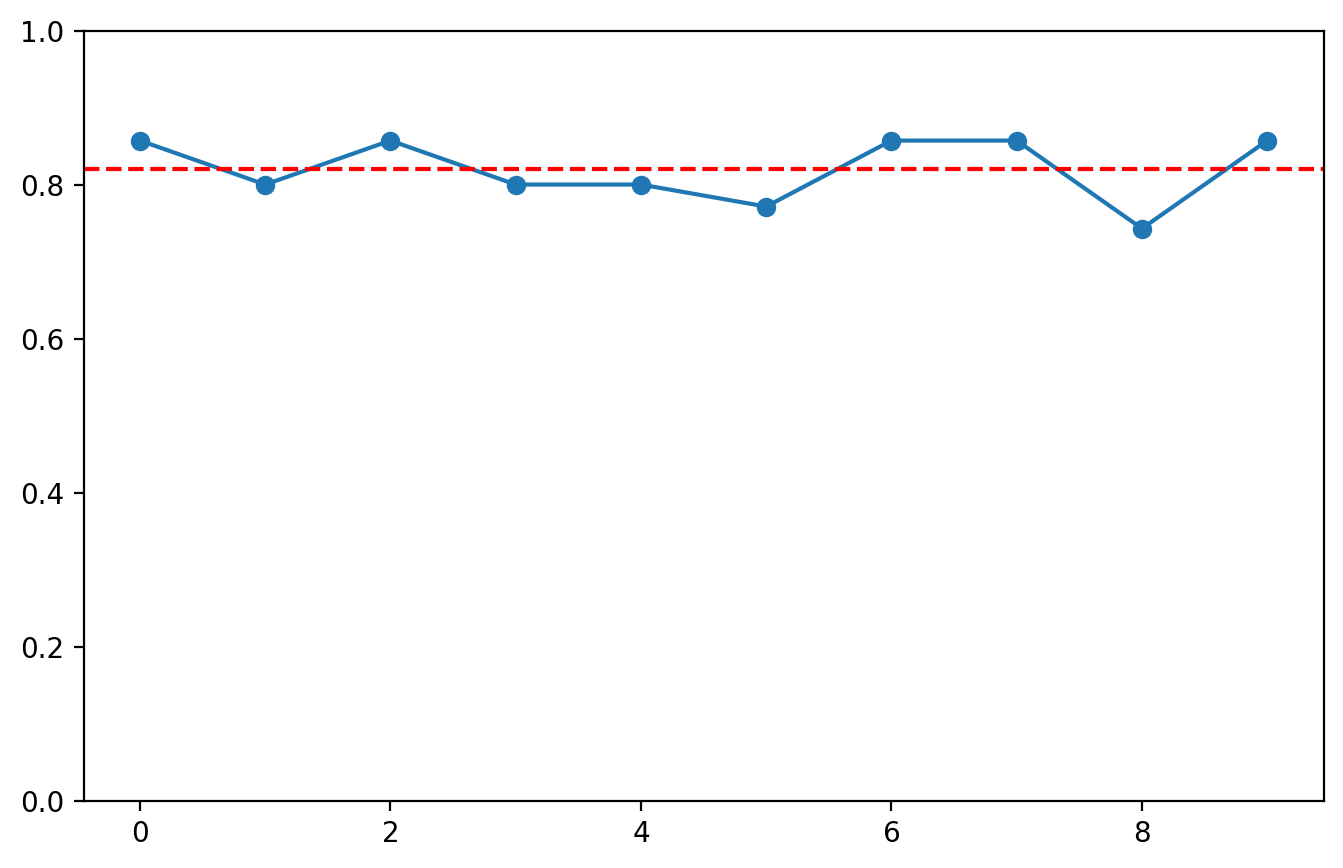

In [44]:
# 성능 정보 시각화
plt.figure(figsize=(8, 5))
plt.plot(result, marker='o')
plt.axhline(np.mean(result), color='r', linestyle='--')
plt.ylim(0, 1)
plt.show()

- 여러 번 수행해 얻은 정확도 평균값을 제시하니 왠지 의미가 있어 보입니다.
- 이제 실제 평가에서 어느 정도의 정확도가 예상된다고 이야기 할 수 있지 않을까요?
- 하지만 이렇게 성능을 예측한다는 것은 **너무 너무 번거로운 작업입니다.**
- 또한 랜덤하게 선택했다는 것이 뭔가 **계획성이 없어 보입니다.**

## 5.성능 확인


- 어찌 되었건 예정대로 학습하고 예측하고 평가해 봅니다.

In [45]:
# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8733333333333333


- 실제 평가에서 예상했던 성능이 나오지 않을 가능성은 충분히 있습니다.
- 성능이 더 좋을 수도 있고 나쁠 수도 있습니다.
- 우리는 그저 주어진 학습용 데이터로 최선을 다해 성능을 예측했던 것입니다.